# zone by zone analysis

In [140]:
# this set up the  interactive visualisation mode for graphics.
%matplotlib notebook 
#%matplotlib inline
from operator import itemgetter
from itertools import groupby
import pandas as pd
import numpy as np
pd.set_option('display.max_rows',7) #only visualise 7 rows when displaying tables
from vega import vegalite
import vega
import matplotlib.pyplot as plt
from scipy import ndimage as ndi
from skimage import feature
from skimage import measure
from ipywidgets import interact, interactive, fixed

# Deploying the strategy 

In [143]:
def analyse(im):
    im  = im[:,:,0]
    edges = feature.canny(im,sigma=0.5)
    
    res=[]
    for k in range(edges.shape[1]):
        j, = np.where( edges[:,k]==True)
        ranges = []
        data=j
        for key, group in groupby(enumerate(data), lambda i: i[0] - i[1]):
            group = list(map(itemgetter(1), group))
            if len(group) > 1:
                ranges.append(range(group[0], group[-1]))
            else:
                ranges.append(group[0])## extrapolate the fisrt value to the one just after
        res.append(len(ranges)/2)
    res = res[0:-1] ## remove the last value wich is always 0 by the algo
    res[0] = res[1]
    s = pd.Series(res)
    r = s.rolling(window=50,center=True,min_periods=3).mean()
    df = pd.DataFrame({'Analyse':s, 'Moyenne glissante':r})
    return {'im': im, 'edges':edges, 'df':df}

def plot_edges(im, edges):
    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True)
    ax1.imshow(im,cmap=plt.cm.gray)
    ax2.imshow(edges,cmap=plt.cm.gray)
    return fig

def plot_analysis(im, edges,r, width=10):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=False, figsize=(width, 4))
    ax1.imshow(im,cmap=plt.cm.gray)
    ax2.imshow(edges,cmap=plt.cm.gray)
    r.plot(ax=ax3)
    ymax=max(r)
    xmax=r.idxmax(axis=0, skipna=True)
    
    ax1.set_title('Image originale')
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    
    ax2.set_title('Edges')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')
    
    ax3.set_ylim(0,ymax+25)
    ax3.set_title('Number of Striations')
    ax3.set_xlabel('x')
    ax3.set_ylabel('nb de stries [-]')
    ax3.annotate('Max:', xy=(xmax, ymax), xytext=(xmax, ymax+10),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    
    return fig

In [144]:
from PIL import Image
import glob
image_list = []
for filename in glob.glob('samples/*.tif'):
    im=plt.imread(filename)
    image_list.append(im)
    
res = [ analyse(x) for x in image_list]

In [145]:
def browse_samples(images):
    n = len(images)
    def view_image(i):
        fig =plot_analysis(res[i]['im'],res[i]['edges'],res[i]['df']['Moyenne glissante'],width=12)
        
    interact(view_image, i=(0,n-1))

<IPython.core.display.Javascript object>


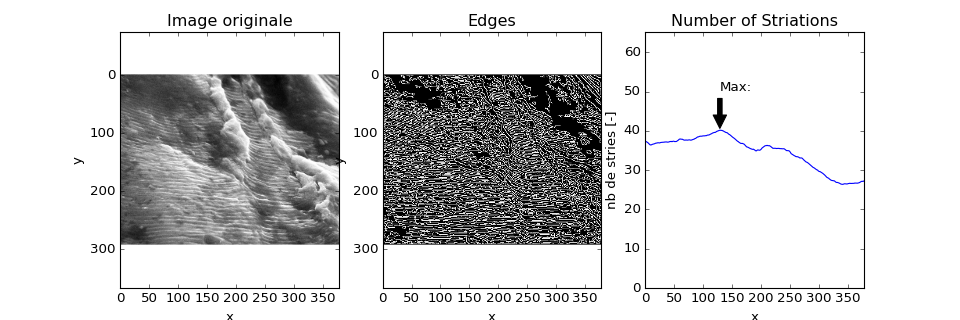

In [146]:
browse_samples(image_list)

In [9]:
import mplleaflet


Remove vertical edges
Make lines from egdes 
Egdes between grains
Max or average values with st dev

In [12]:
res[1]


{'df':       Analyse  Moyenne glissante
 0        69.5          73.140000
 1        69.5          72.980769
 2        68.5          72.962963
 ...       ...                ...
 1020     88.0          67.821429
 1021     71.5          67.888889
 1022     80.5          67.826923
 
 [1023 rows x 2 columns],
 'edges': array([[False, False, False, ..., False, False, False],
        [False, False, False, ...,  True,  True, False],
        [False, False, False, ..., False, False, False],
        ..., 
        [False, False, False, ..., False, False, False],
        [False,  True,  True, ..., False, False, False],
        [False, False, False, ..., False, False, False]], dtype=bool),
 'im': array([[ 16,  12,  12, ..., 148, 139, 143],
        [ 16,  14,  14, ..., 122, 122, 124],
        [ 12,  12,  17, ..., 114, 118, 119],
        ..., 
        [ 73,  76,  76, ..., 242, 242, 241],
        [ 68,  62,  63, ..., 237, 233, 235],
        [ 51,  65,  65, ..., 228, 233, 230]], dtype=uint8)}

In [80]:
first=(res[1]['edges'][:,1])

In [102]:
i, = np.where( first==True )

In [98]:
i=i.reshape(-1, 1).tolist()
type(i)

list

In [105]:
from operator import itemgetter
from itertools import groupby
ranges = []
data=i
for key, group in groupby(enumerate(data), lambda i: i[0] - i[1]):
    group = list(map(itemgetter(1), group))


    if len(group) > 1:
        ranges.append(range(group[0], group[-1]))
    else:
        ranges.append(group[0])

In [110]:
len(ranges)

106

- find index of true values.

- sum the non consecutive values



In [124]:
i=res[1]['edges'][1,:].size

In [125]:
i

1024